In [17]:
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cp

# Return original value of function f(x) = x^n for given x & n
def f(x, n):
  return x**n

# return an 1 x n array of [1 x x^2 x^3 ... x^n] for given x & n
def g(x, n):
  xk = []
  for i in range(n):
    xk.append(x**i)
  return np.array(xk)

**L1 Cost Function:**

In [18]:
def cost_fn_L1(N, n):
  a = cp.Variable((n, 1))           # a = [a_0 a_1 a_2 ... a_n-1]
  xk = np.linspace(-1, 1, 2*N+1)    # 2N+1 equally spaced points betweeen -1 and 1
  cost = cp.sum_squares(cp.reshape(f(xk, n), (2*N+1, 1)) - g(xk, n).T @ a)  #summation_k (true-approx)^2
  problem = cp.Problem(cp.Minimize(cost))     #We have to minimize the cost
  print("For n =", n)
  print("Optimal cost: ", problem.solve())
  print("Coefficients of polynomial of degree n-1: \n", a.value)

  #For graph of true vs approx function
  plt.figure()
  plt.plot(xk, f(xk, n), label = 'true')
  plt.plot(xk, g(xk, n).T @ a.value, color='red', linestyle='dotted', linewidth = 3, label = 'approx')
  plt.legend()
  print("\n")

For n = 5
Optimal cost:  0.07444633479910712
Coefficients of polynomial of degree n-1: 
 [[-1.51425849e-17]
 [-2.60417857e-01]
 [ 1.29424172e-16]
 [ 1.16250000e+00]
 [-7.08576970e-17]]


For n = 10
Optimal cost:  7.779804136600807e-05
Coefficients of polynomial of degree n-1: 
 [[ 1.57996731e-03]
 [ 1.45817098e-16]
 [-8.45272049e-02]
 [-2.37280281e-15]
 [ 7.11974983e-01]
 [ 1.03425593e-14]
 [-2.07407467e+00]
 [-1.59038790e-14]
 [ 2.44342105e+00]
 [ 7.92757236e-15]]


For n = 15
Optimal cost:  5.727416050164092e-08
Coefficients of polynomial of degree n-1: 
 [[ 1.48825123e-12]
 [ 6.61626521e-04]
 [-1.45650916e-10]
 [-2.64374549e-02]
 [ 2.34653398e-09]
 [ 3.02670678e-01]
 [-1.42253822e-08]
 [-1.51622498e+00]
 [ 4.11180054e-08]
 [ 3.87452809e+00]
 [-6.10144968e-08]
 [-5.27388337e+00]
 [ 4.48669796e-08]
 [ 3.63867465e+00]
 [-1.29477132e-08]]




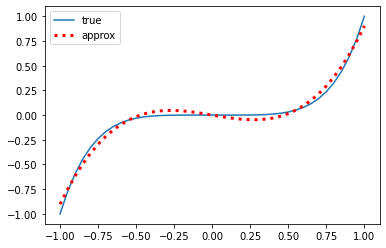

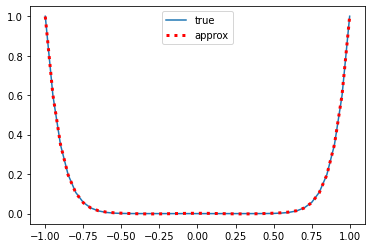

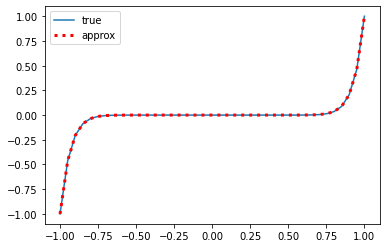

In [19]:
N = 20

# For n = 5
n = 5
cost_fn_L1(N, n)

# For n = 10
n = 10
cost_fn_L1(N, n)

# For n = 15
n = 15
cost_fn_L1(N, n)

**Optimal cost as a function of n for L1 cost function**

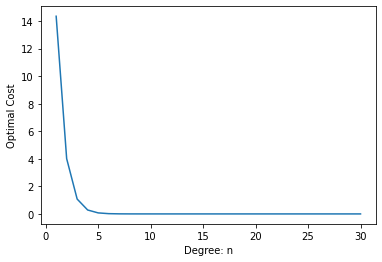

In [20]:
# Function that returns optimal cost for a given n
def optimal_cost_L1(n):
  a = cp.Variable((n, 1))           # a = [a_0 a_1 a_2 ... a_n-1]
  xk = np.linspace(-1, 1, 2*N+1)    # 2N+1 equally spaced points betweeen -1 and 1
  cost = cp.sum_squares(cp.reshape(f(xk, n), (2*N+1, 1)) - g(xk, n).T @ a)
  problem = cp.Problem(cp.Minimize(cost))
  return problem.solve()


deg = []            # deg = [1, 2, 3, ..., 30]
opt_cost = []       # Optimal cost for 30 values of n
for i in range(1, 31):
  deg.append(i)
  opt_cost.append(optimal_cost_L1(i))

plt.figure()
plt.plot(deg, opt_cost)
plt.xlabel("Degree: n")
plt.ylabel("Optimal Cost")
plt.show()

**L2 Cost Function:**

In [21]:
def cost_fn_L2(N, n):
  a = cp.Variable((n, 1))           # a = [a_0 a_1 a_2 ... a_n-1]
  xk = np.linspace(-1, 1, 2*N+1)    # 2N+1 equally spaced points betweeen -1 and 1
  cost = cp.sum(cp.abs((cp.reshape(f(xk, n), (2*N+1, 1)) - g(xk, n).T @ a))) # summation_k |(true-approx.)|
  problem = cp.Problem(cp.Minimize(cost))
  print("For n =", n)
  print("Optimal cost: ", problem.solve())
  print("Coefficients of polynomial of degree n-1: \n", a.value)

  # For graph of true vs approx function
  plt.figure()
  plt.plot(xk, f(xk, n), label = 'true')
  plt.plot(xk, g(xk, n).T @ a.value, color='red', linestyle='dotted', linewidth = 3, label = 'approx')
  plt.legend()
  print("\n")

For n = 5
Optimal cost:  1.4253224970851734
Coefficients of polynomial of degree n-1: 
 [[ 1.21115666e-22]
 [-2.02500000e-01]
 [-8.21088320e-17]
 [ 1.06000000e+00]
 [ 2.40087118e-16]]


For n = 10
Optimal cost:  0.046698167793043345
Coefficients of polynomial of degree n-1: 
 [[ 1.09892250e-03]
 [ 1.72892213e-17]
 [-6.09301882e-02]
 [-5.03689937e-16]
 [ 5.77650016e-01]
 [ 3.55482978e-15]
 [-1.84531875e+00]
 [-7.24671724e-15]
 [ 2.32750000e+00]
 [ 4.26657514e-15]]


For n = 15
Optimal cost:  0.0012085845113081082
Coefficients of polynomial of degree n-1: 
 [[ 2.26136714e-19]
 [ 6.18566601e-04]
 [-1.09030963e-16]
 [-2.47975423e-02]
 [ 3.87049216e-15]
 [ 2.85717845e-01]
 [-4.08551775e-14]
 [-1.45224979e+00]
 [ 1.85780575e-13]
 [ 3.76870463e+00]
 [-4.05386121e-13]
 [-5.19549368e+00]
 [ 4.13345130e-13]
 [ 3.61749998e+00]
 [-1.56803870e-13]]




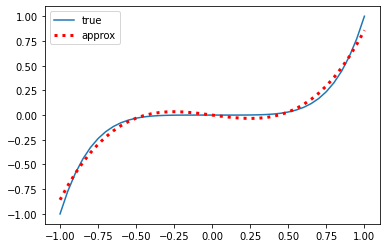

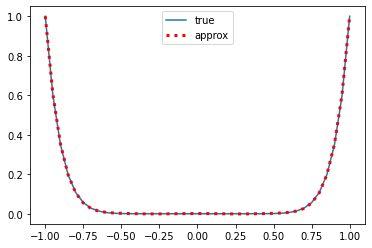

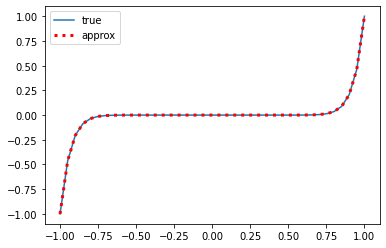

In [22]:
N = 20

# For n = 5
n = 5
cost_fn_L2(N, n)

# For n = 10
n = 10
cost_fn_L2(N, n)

# For n = 15
n = 15
cost_fn_L2(N, n)

**Optimal cost as a function of n for L2 cost function**

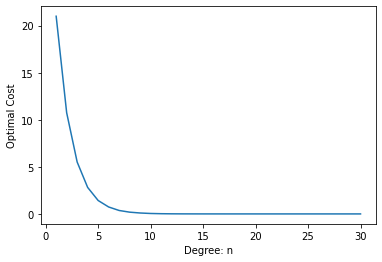

In [23]:
def optimal_cost_L2(n):
  a = cp.Variable((n, 1))           # a = [a_0 a_1 a_2 ... a_n-1]
  xk = np.linspace(-1, 1, 2*N+1)    # 2N+1 equally spaced points betweeen -1 and 1
  cost = cp.sum(cp.abs((cp.reshape(f(xk, n), (2*N+1, 1)) - g(xk, n).T @ a)))
  problem = cp.Problem(cp.Minimize(cost))
  return problem.solve()

deg = []            # deg = [1, 2, 3, ..., 30]
opt_cost = []       # Optimal cost for 30 values of n
for i in range(1, 31):
  deg.append(i)
  opt_cost.append(optimal_cost_L2(i))

plt.figure()
plt.plot(deg, opt_cost)
plt.xlabel("Degree: n")
plt.ylabel("Optimal Cost")
plt.show()